In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets_AAPL_stock_price.csv",parse_dates=["Date"],index_col="Date")

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900
2019-08-13,201.020004,212.139999,200.479996,208.970001,208.970001,47218500
2019-08-14,203.160004,206.440002,202.589996,202.750000,202.750000,36453100


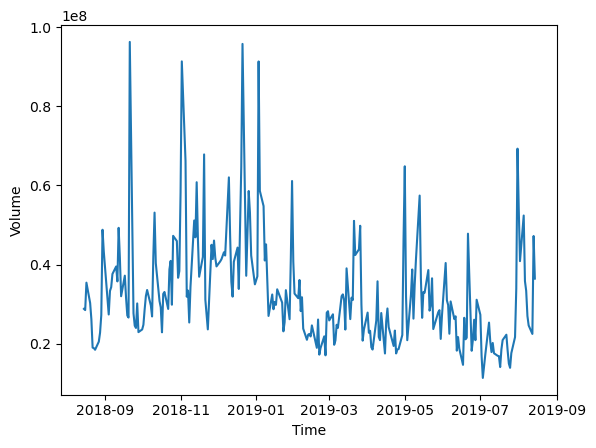

In [5]:
figure, ax = plt.subplots()
ax.plot(data.index,data["Volume"])
ax.set_xlabel("Time")
ax.set_ylabel("Volume")
plt.show()

In [6]:
date_range_year = pd.date_range(start="2018-08-15", end="2019-08-14", freq="YE")
print(date_range_year)

DatetimeIndex(['2018-12-31'], dtype='datetime64[ns]', freq='YE-DEC')


In [7]:
year_wise_volume = data.groupby(data.index.year)["Volume"].sum()
print(year_wise_volume)

Date
2018    3697220200
2019    4560597300
Name: Volume, dtype: int64


In [8]:
date_range_2019 = data["2019-01-01": "2019-08-14"]

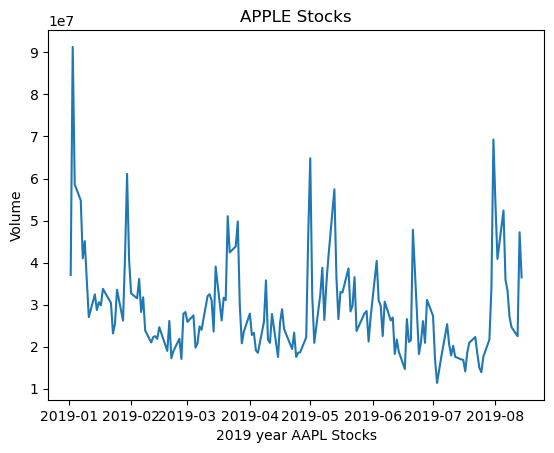

In [15]:
figure1, ax1 = plt.subplots()
ax1.plot(date_range_2019.index, date_range_2019["Volume"])
ax1.set_xlabel("2019 year AAPL Stocks")
ax1.set_ylabel("Volume")
ax1.set_title("APPLE Stocks")
plt.show()

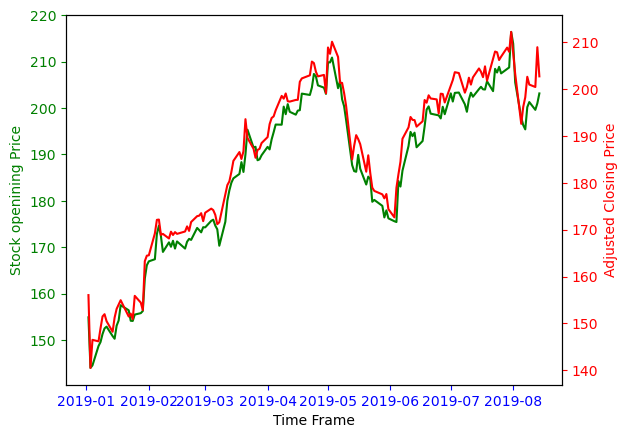

In [20]:
fig, ax = plt.subplots()
ax.plot(date_range_2019.index, date_range_2019["Open"], color="g")
ax.set_xlabel("Time Frame")
ax.set_ylabel("Stock openining Price", color="green")
ax.tick_params("x", colors="b")
ax.tick_params("y", colors="g")
ax2 = ax.twinx()

ax2.plot(date_range_2019.index,date_range_2019["Adj Close"], color="red")
ax2.set_ylabel("Adjusted Closing Price", color="r")
ax2.tick_params("y",colors="r")
plt.show()

In [23]:
def timeseries_plot(axes,x,y,color,xlabel,ylabel):
    axes.plot(x,y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color=color)
    axes.tick_params("y", colors=color)

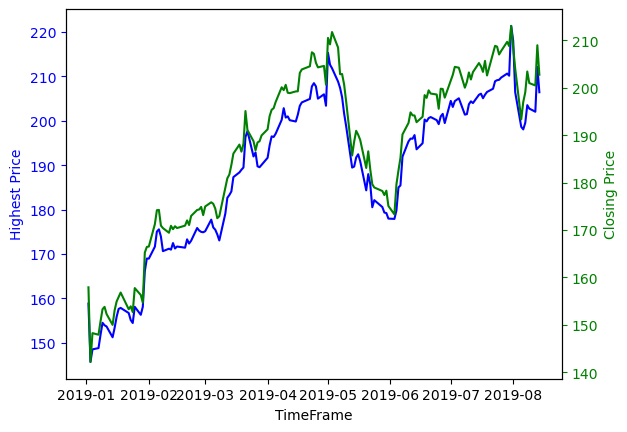

In [57]:
fig , ax = plt.subplots()
timeseries_plot(ax,date_range_2019.index,date_range_2019["High"],"b","TimeFrame","Highest Price")
ax.annotate('>20',xy=(pd.Timestamp('2019-05-16'),1))
ax2= ax.twinx()

timeseries_plot(ax2,date_range_2019.index, date_range_2019["Close"],"g","TimeFrame", "Closing Price")

ax2.annotate('>1 degree',xy=(date_range_2019.index[len(date_range_2019.index)//2],100))
plt.show()

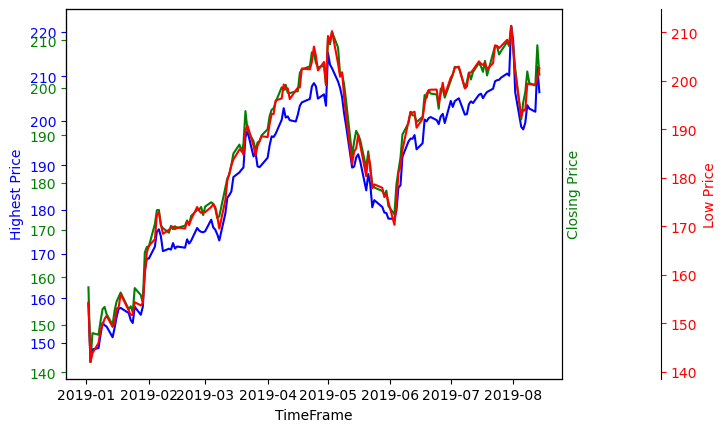

In [39]:
fig , ax = plt.subplots()
timeseries_plot(ax,date_range_2019.index,date_range_2019["High"],"b","TimeFrame","Highest Price")

ax2= ax.twinx()

timeseries_plot(ax2,date_range_2019.index, date_range_2019["Close"],"g","TimeFrame", "Closing Price")

ax3 = ax2.twinx()
ax3.spines['right'].set_position(('axes', 1.2))

timeseries_plot(ax3,date_range_2019.index, date_range_2019["Low"],"r","TimeFrame", "Low Price")

plt.show()

In [45]:
date_range_2019.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', name='Date', length=156, freq=None)

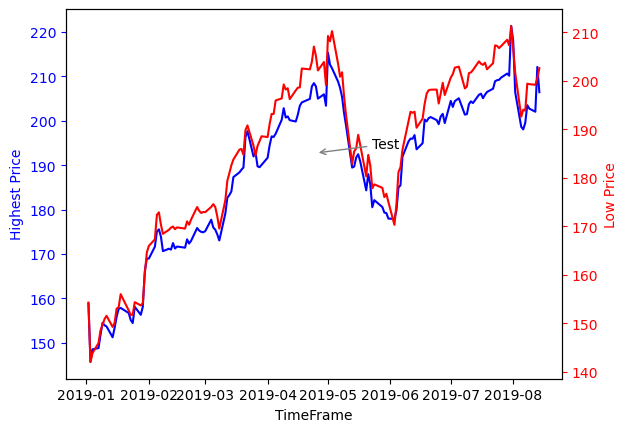

In [47]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
timeseries_plot(ax,date_range_2019.index,date_range_2019["High"],"b","TimeFrame","Highest Price")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
timeseries_plot(ax2,date_range_2019.index, date_range_2019["Low"],"r","TimeFrame", "Low Price")

# Annotate point with relative
ax2.annotate("Test", xy=(date_range_2019.index[len(date_range_2019.index)//2], date_range_2019["Low"].mean()),
             xytext=(date_range_2019.index[len(date_range_2019.index)//2 + 20], date_range_2019["Low"].mean() + 1),
             arrowprops={"arrowstyle": "->", "color": "gray"})

plt.show()